# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mesa/time.py:79: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


Budget: 585.8445240911195
before: 0.5050167900025564
None
Budget: 5810.900720909013
before: 0
Sandbags
0.0
Budget: 3354.825010702315
before: 0.8401745322903181
None
Budget: 474.82039944838954
before: 0.7166481949420124
None
Budget: 2770.826075842427
before: 0.5478991347589822
None
Budget: 3332.9017139471866
before: 0.5738351951662107
None
Budget: 570.9521416071937
before: 0.44835266816082264
None
Budget: 3969.4810101636117
before: 0.7820780859008485
None
Budget: 1174.8972783215968
before: 0.7422442814115114
None
Budget: 437.78270724930627
before: 0.8901462440924541
None
Budget: 5282.910512683802
before: 0.44106423284228746
Sandbags
0.022053211642114375
Budget: 457.0357576102578
before: 0.5200204155541415
None
Budget: 5958.220093299125
before: 0.41905990102442664
Sandbags
0.020952995051221335
Budget: 3532.822161962278
before: 0.4570561481497166
None
Budget: 1173.5560255071607
before: 0.625175233932417
None
Budget: 747.3778717633021
before: 0.48924628420179983
None
Budget: 218.6409641078

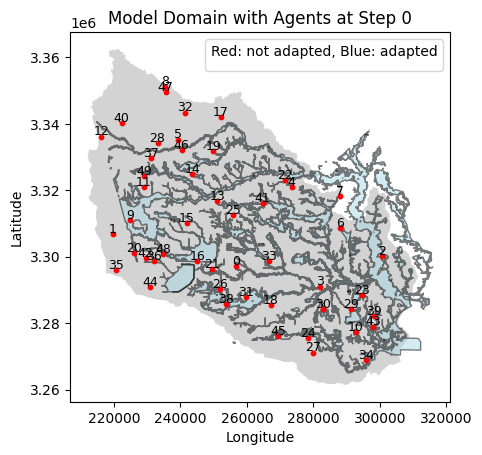

NameError: name 'agent' is not defined

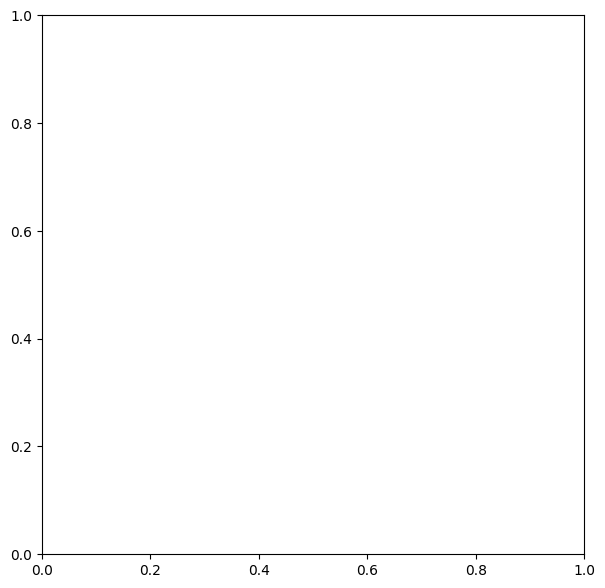

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
from agents import Government

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# # Define a function to plot agents on the network.
# # This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
        # Clear the current axes.
        ax.clear()
        # Determine the color of each node (agent) based on their adaptation status.
        colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
        # Draw the network with node colors and labels.
        nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
        # Set the title of the plot with the current step number.
        ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

 # Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()

for measure, count in model.flood_measure_count.items():
    print(f"{measure}: {count} times purchased")
# Assuming 'model' is your AdaptationModel instance
government_agent = Government(unique_id="gov_1", model=model)
model.schedule.add(government_agent)

# Optionally, you can directly call methods of the Government agent here
government_agent.support_non_adapted_households()

In [ ]:
agent_data = model.datacollector.get_model_vars_dataframe()
agent_data


,total_adapted_households
0,14
1,14
2,14
3,17
4,20
5,22
6,25
7,28
8,30
9,31


In [ ]:
model_data = model.datacollector.get_agent_vars_dataframe()
model_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   5.599182              0.949070          0.000000   
     1                   0.575451              0.551816          0.000000   
     2                   0.000000              0.000000          0.000000   
     3                   2.458327              0.805349          0.000000   
     4                   0.874474              0.031244          0.000000   
...                           ...                   ...               ...   
19   45                  0.557667              0.546335          0.596338   
     46                  2.313633              0.794758          1.920102   
     47                  0.517218              0.533188          0.465181   
     48                  0.624710              0.028308          0.714347   
     49                  0.284994              0.429127          0.247102   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID                                               
0    0                 0.000000      False             3   
     1                 0.000000      False             4   
     2                 0.000000       True             4   
     3                 0.000000      False             4   
     4                 0.000000       True             2   
...                         ...        ...           ...   
19   45                0.558041       True             4   
     46                0.762205       True             3   
     47                0.514674      False             5   
     48                0.589567       True             3   
     49                0.404217      False             4   

                                                   location         wealth  \
Step AgentID                                                                 
0    0         POINT (293403.94009351643 3265765.428371297)    8056.555395   
     1        POINT (277828.07615277293 3314397.6972036576)   10373.945434   
     2         POINT (220842.3411236933 3355776.4065457457)   11031.973078   
     3         POINT (298494.0761824248 3306237.1643429813)   13705.036307   
     4          POINT (221968.74521264053 3312338.28755779)    8994.749478   
...                                                     ...            ...   
19   45         POINT (222688.3599239203 3315667.950801351)  148159.448066   
     46        POINT (237722.87760760327 3317042.039715162)   89654.353216   
     47        POINT (273392.5168976425 3277763.9353324943)   23075.543497   
     48         POINT (293045.1021542903 3301268.818681859)  133322.194095   
     49        POINT (300537.4290919766 3284675.3596974043)   28038.583283   

                           selected_measure reduction_factors household_info  
Step AgentID                                                                  
0    0                             Sandbags              None           None  
     1                                 None              None           None  
     2                                 None              None           None  
     3                             Sandbags              None           None  
     4                             Sandbags              None           None  
...                                     ...               ...            ...  
19   45       Relocating electrical systems              None           None  
     46       Relocating electrical systems              None           None  
     47                            Sandbags              None           None  
     48                            Sandbags              None           None  
     49                            Sandbags              None           None  

[1000 rows x 11 columns]